## LBPH Evaluation

### Methodology

1. Normalize each image from the dataset by: 
    * Pre-processing - histogram equalization
    * Post-processing - 2D facial alignment
2. Randomise folds containing train-test splits for each subject
3. Train a classifier on each fold's train split
4. Evaluate the trained model in step 4 by it's corresponding test split
5. Repeat step 2, 3, 4 by varying the number of training samples per subject
6. Report the average value of **Precision@1** across each fold.

In [9]:
from __future__ import division
from multiprocessing import Process, Queue
import numpy as np

In [2]:
from Dataset import Dataset
from FaceRecognizer import FaceRecognizer

In [3]:
def predict_one(idx, recognizer_obj, image, queue):
    queue.put((idx, recognizer_obj.model.predict(image)))

### ATT Dataset

In [5]:
dataset_path =  "/media/ankurrc/new_volume/softura/facerec/datasets/norm_standard_att"

In [4]:
folds = 3
training_samples = [2, 5, 8]

In [7]:
results = []

#### Train the recognizer for the different folds and evaluate

In [21]:
recognizer_model = FaceRecognizer()
dataset = Dataset(dataset_path)

In [22]:
for training_sample in training_samples:
    print "Training on", training_sample, "samples per subject."
    for fold in range(1, folds+1):
        output = Queue()
        X_train, y_train = dataset.load_data(is_train=True, fold=fold, num_train=training_sample)
        print "Training recognizer (", len(X_train), "samples and", len(np.unique(y_train)), "subjects)..."
        recognizer_model.train(X_train, y_train)
        print "completed."
        X_test, y_test = dataset.load_data(is_train=False, fold=fold, num_train=training_sample)
        print "Predicting on (", len(X_test), "samples)..."
        processes = [Process(target=predict_one,
                             args=(idx,
                                   recognizer_model,
                                   image,
                                   output))
                     for idx, image in enumerate(X_test)]

        for p in processes:
            p.start()

        predictions = [output.get() for p in processes]

        for p in processes:
            p.join()

        print "Done"

        predictions = [(x[1][0], x[1][1])
                       for x in sorted(predictions, key=lambda x: x[0])]
        recognizer_model.evaluate(predictions, y_test)
        
    print "-"*120

Training on 2 samples per subject.
Training recognizer ( 80 samples and 40 subjects)...
completed.
Predicting on ( 314 samples)...
Done
Precision@1: 276 / 314 ( 87.898089172 %)
Training recognizer ( 80 samples and 40 subjects)...
completed.
Predicting on ( 314 samples)...
Done
Precision@1: 270 / 314 ( 85.9872611465 %)
Training recognizer ( 80 samples and 40 subjects)...
completed.
Predicting on ( 314 samples)...
Done
Precision@1: 276 / 314 ( 87.898089172 %)
------------------------------------------------------------------------------------------------------------------------
Training on 5 samples per subject.
Training recognizer ( 200 samples and 40 subjects)...
completed.
Predicting on ( 194 samples)...
Done
Precision@1: 186 / 194 ( 95.8762886598 %)
Training recognizer ( 200 samples and 40 subjects)...
completed.
Predicting on ( 194 samples)...
Done
Precision@1: 190 / 194 ( 97.9381443299 %)
Training recognizer ( 200 samples and 40 subjects)...
completed.
Predicting on ( 194 samples).

### Cyber Extruder Ultimate Dataset

In [5]:
dataset_path =  "/media/ankurrc/new_volume/softura/facerec/datasets/norm_cyber_extruder_ultimate"

In [6]:
recognizer_model = FaceRecognizer()
dataset = Dataset(dataset_path)

In [7]:
for training_sample in training_samples:
    print "Training on", training_sample, "samples per subject."
    for fold in range(1, folds+1):
        X_train, y_train = dataset.load_data(is_train=True, fold=fold, num_train=training_sample)
        print "Training recognizer (", len(X_train), "samples and", len(np.unique(y_train)), "subjects)..."
        recognizer_model.train(X_train, y_train)
        print "completed."
        X_test, y_test = dataset.load_data(is_train=False, fold=fold, num_train=training_sample)
        print "Predicting on (", len(X_test), "samples)..."
        predictions = recognizer_model.predict(images=X_test)
        print "Done"
        recognizer_model.evaluate(predictions, y_test)
        
    print "-"*120

Training on 2 samples per subject.
Training recognizer ( 1998 samples and 999 subjects)...
completed.


  0%|          | 1/5186 [00:00<15:20,  5.64it/s]

Predicting on ( 5186 samples)...


100%|██████████| 5186/5186 [15:52<00:00,  5.45it/s]


Done
Precision@1: 1253 / 5186 ( 24.1612032395 %)
Training recognizer ( 1998 samples and 999 subjects)...
completed.


  0%|          | 1/5186 [00:00<15:28,  5.58it/s]

Predicting on ( 5186 samples)...


100%|██████████| 5186/5186 [16:15<00:00,  5.31it/s]


Done
Precision@1: 1210 / 5186 ( 23.3320478211 %)
Training recognizer ( 1998 samples and 999 subjects)...
completed.


  0%|          | 1/5186 [00:00<16:33,  5.22it/s]

Predicting on ( 5186 samples)...


100%|██████████| 5186/5186 [16:01<00:00,  5.39it/s]


Done
Precision@1: 1254 / 5186 ( 24.1804859236 %)
------------------------------------------------------------------------------------------------------------------------
Training on 5 samples per subject.
Training recognizer ( 3715 samples and 743 subjects)...
completed.


  0%|          | 0/2349 [00:00<?, ?it/s]

Predicting on ( 2349 samples)...


100%|██████████| 2349/2349 [15:05<00:00,  2.59it/s]


Done
Precision@1: 878 / 2349 ( 37.3776074926 %)
Training recognizer ( 3715 samples and 743 subjects)...
completed.


  0%|          | 0/2349 [00:00<?, ?it/s]

Predicting on ( 2349 samples)...


100%|██████████| 2349/2349 [14:26<00:00,  2.71it/s]


Done
Precision@1: 882 / 2349 ( 37.5478927203 %)
Training recognizer ( 3715 samples and 743 subjects)...
completed.


  0%|          | 0/2349 [00:00<?, ?it/s]

Predicting on ( 2349 samples)...


100%|██████████| 2349/2349 [14:38<00:00,  2.67it/s]


Done
Precision@1: 904 / 2349 ( 38.484461473 %)
------------------------------------------------------------------------------------------------------------------------
Training on 8 samples per subject.
Training recognizer ( 3520 samples and 440 subjects)...


  0%|          | 0/440 [00:00<?, ?it/s]

completed.
Predicting on ( 440 samples)...


100%|██████████| 440/440 [02:42<00:00,  2.70it/s]


Done
Precision@1: 228 / 440 ( 51.8181818182 %)
Training recognizer ( 3520 samples and 440 subjects)...


  0%|          | 0/440 [00:00<?, ?it/s]

completed.
Predicting on ( 440 samples)...


100%|██████████| 440/440 [02:44<00:00,  2.68it/s]


Done
Precision@1: 208 / 440 ( 47.2727272727 %)
Training recognizer ( 3520 samples and 440 subjects)...
completed.


  0%|          | 0/440 [00:00<?, ?it/s]

Predicting on ( 440 samples)...


100%|██████████| 440/440 [02:40<00:00,  2.74it/s]

Done
Precision@1: 225 / 440 ( 51.1363636364 %)
------------------------------------------------------------------------------------------------------------------------


## Results

In [11]:
result_att = np.array([[87.89, 85.98, 87.89], [95.87, 97.93, 96.39], [98.6, 100.0, 100.0]])
result_ceu = np.array([[24.16, 23.33, 24.18], [37.37, 37.54, 38.48], [51.81 ,47.27, 51.13]])
samples_subject = [2, 5, 8]

In [15]:
att_avg = np.mean(axis=1, a=result_att)
ceu_avg = np.mean(axis=1, a=result_ceu)

In [16]:
import matplotlib.pyplot as plt

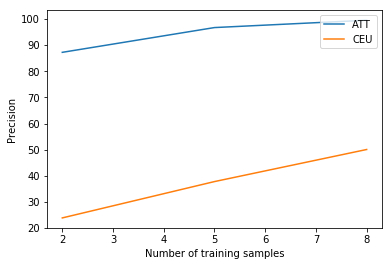

In [24]:
plt.xlabel('Number of training samples')
plt.ylabel('Precision')
plt.plot(samples_subject, att_avg, label="ATT")
plt.plot(samples_subject, ceu_avg, label="CEU")
plt.legend(loc='upper right')
plt.show()